Основную часть упражнений модуля мы будем выполнять на примере датасета, содержащего информацию о посещениях одного из ресторанов быстрого питания в США в начале 90-х годов. 

In [2]:
import  pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Как видно из рисунка, датасет содержит семь показателей:

* total_bill — общая сумма, уплаченная за заказ;
* tip — размер чаевых;
* sex — пол клиента;
* smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
* day — день недели;
* time — время (обед или ужин);
* size — количество посетителей, обедавших за столом.

Для быстрого и корректного отображения графиков, которые мы будем строить, запустите на работу магическую команду:

In [3]:
%matplotlib inline

Эта команда позволит нам автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.

### Общий синтаксис метода plot

Основным методом, который предлагает Pandas для быстрого создания простейших графиков и диаграмм, является метод plot. Примените этот метод к нашему датафрейму и посмотрите на результат:

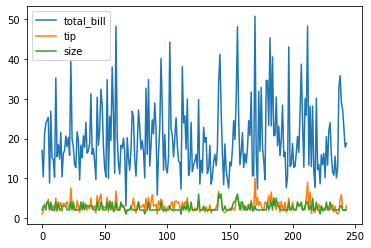

In [4]:
df.plot()

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.

Настройка параметров метода
Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

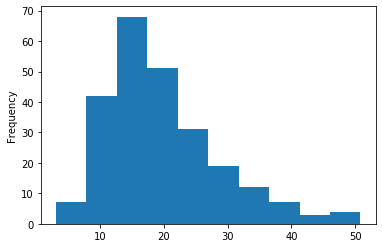

In [6]:
df['total_bill'].plot(kind='hist')

Добавление параметров grid и title дополнит отображаемую диаграмму еще несколькими деталями:

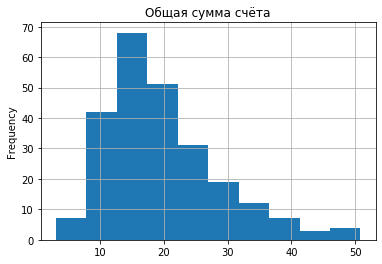

In [8]:
df['total_bill'].plot(kind='hist', grid=True, title='Общая сумма счёта')

Для работы с категориальными (нечисловыми) переменными с помощью метода hist датафрейм необходимо предварительно обработать. Например, если мы хотим увидеть распределение посетителей по дням недели, нужно предварительно посчитать, сколько заказов пришлось на каждый из дней недели. Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать в этом случае, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

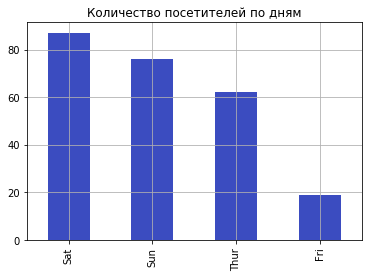

In [9]:
df['day'].value_counts().plot(kind='bar', 
                              grid=True, 
                              colormap='coolwarm', 
                              title='Количество посетителей по дням')